## 1. Entendimento do Problema e Definição de Objetivos

•	Tarefa: Analisar o problema proposto pelo conjunto de dados escolhido. Entender a natureza do problema (classificação binária, multiclasse ou regressão) e definir claramente os objetivos do projeto.

## 2. Coleta e Preparação de Dados

•	Tarefa: Realizar o carregamento do dataset e fazer uma análise exploratória inicial. Isso inclui uma análise detalhada das variáveis, tipos de dados, presença de valores nulos ou inconsistências.

	•	Subtarefas:
	•	Remover ou preencher valores ausentes.
	•	Normalizar e padronizar as variáveis (se necessário).
	•	Codificar variáveis categóricas (se aplicável).

### Importando o Dataset pelo Kaggle

In [108]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix,  classification_report

from sklearn.model_selection import GridSearchCV

In [4]:
# Download latest version
path = kagglehub.dataset_download("uciml/adult-census-income")

# Carregar o arquivo CSV no DataFrame
df = pd.read_csv(f"{path}/adult.csv")

In [5]:
# Definir opções para mostrar todas as colunas e linhas
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.max_rows', None)     # Mostra todas as linhas
pd.set_option('display.max_colwidth', None) # Mostra o conteúdo completo de cada coluna

## 3. Análise Exploratória de Dados (EDA)

•	Tarefa: Realizar uma análise exploratória de dados aprofundada para entender as correlações entre as variáveis, distribuições e possíveis padrões.
	•	Subtarefas:
	•	Criar gráficos (distribuição, histogramas, box plots, etc.).
	•	Analisar correlações entre as variáveis.
	•	Identificar variáveis que podem ser eliminadas ou combinadas.

In [6]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


### Target

- Ver o Balanceamento entre classes

In [10]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Podemos ver que há um desbalanceamento entre as classes. Teremos que tratar isto.

### Valores "?"

In [11]:
# Contar quantos "?" existem em cada coluna
contagem_interrogacoes = (df == '?').sum()/len(df)*100
print(contagem_interrogacoes)

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64


In [12]:
# Criar um novo DataFrame aplicando a condição

df[['workclass',"occupation","native.country"]] = df[['workclass',"occupation","native.country"]].map(lambda x: "Unknown" if x == "?" else x)

- Considerando que a fração de pessoas que tiveram ganho ou perda de capital é bem pequena, 8.3% para ganho e 4.7% para perda, podemos codificar as colunas para valores binários (True/False ou 1/0)

In [ ]:
# Criar um novo DataFrame aplicando a condição
#df_codificado = df.copy()
#df_codificado[['capital.gain',"capital.loss"]] = df_codificado[['capital.gain',"capital.loss"]].map(lambda x: True if x > 0 else False)

### Distribuição de fnlwgt

Text(0.5, 1.0, 'Boxplot de fnlwgt')

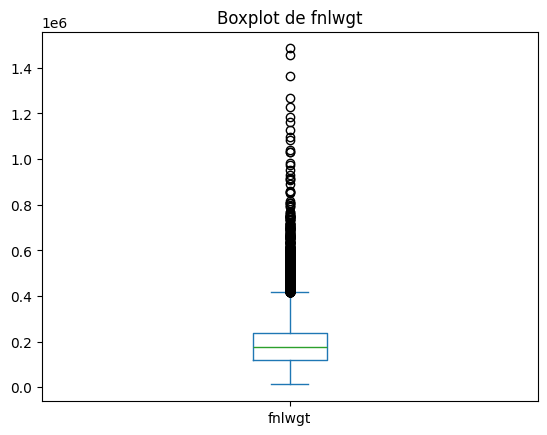

In [13]:
coluna = "fnlwgt"
df[coluna].plot.box()
plt.title(f"Boxplot de {coluna}")

In [14]:
def histograma(df,coluna):
    plt.figure(figsize=(15, 6))
    counts, bins, patches = plt.hist(df[coluna], bins=10, edgecolor='black', alpha=0.7)

    # Adicionar os valores acima das barras
    for count, x in zip(counts, bins):
        plt.text(x + 0.1, count, str(int(count)), ha='center', va='bottom')

    # Configurações do gráfico
    plt.title('Histograma da Coluna "valores"')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.75)

    # Mostrar o gráfico
    plt.show()

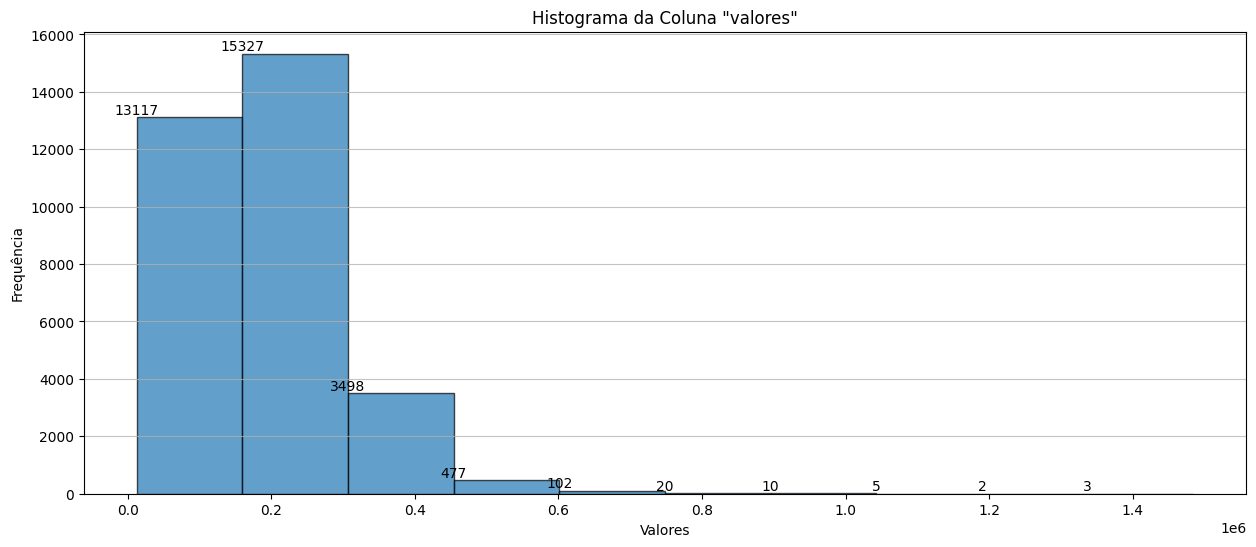

In [16]:
#Criar o histograma
histograma(df,"fnlwgt")

Valores acima de 0.6 milhões aparentam ser ruídos. Vamos retirar

In [17]:
df_truncado = df[df["fnlwgt"] <= 600000]

### Education

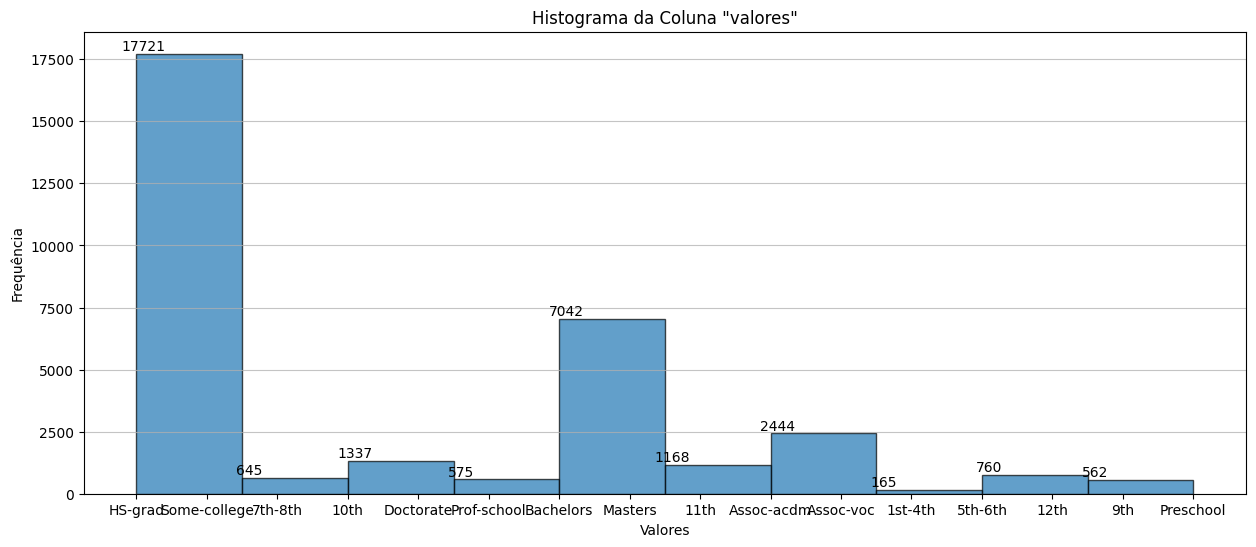

In [18]:
histograma(df_truncado,"education")

### Capital Loss and Gain

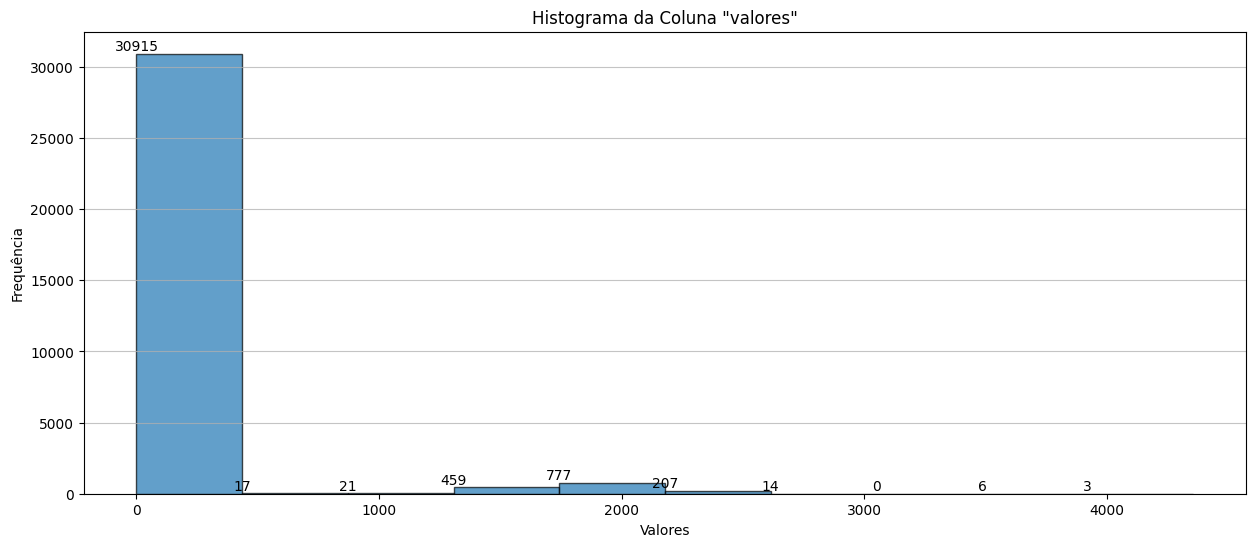

In [52]:
histograma(df_truncado,"capital.loss")

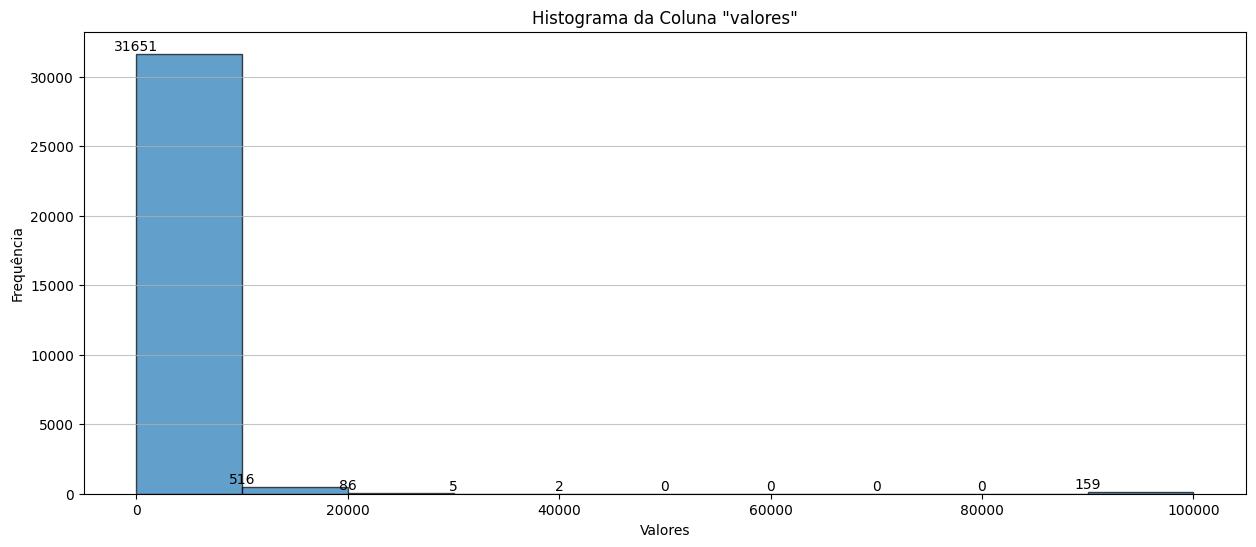

In [53]:
histograma(df_truncado,"capital.gain")

O desbalanceamento é muito, por volta de 90% para valores 0. Isso por enviesar o modelo, portanto vamos remover essas colunas do treinamento.

In [19]:
df_codificado = df_truncado.drop(columns=["capital.gain", "capital.loss"])
df_codificado = df_codificado.reset_index(drop=True)

In [20]:
df_codificado.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K


### Marital Status and Relationship

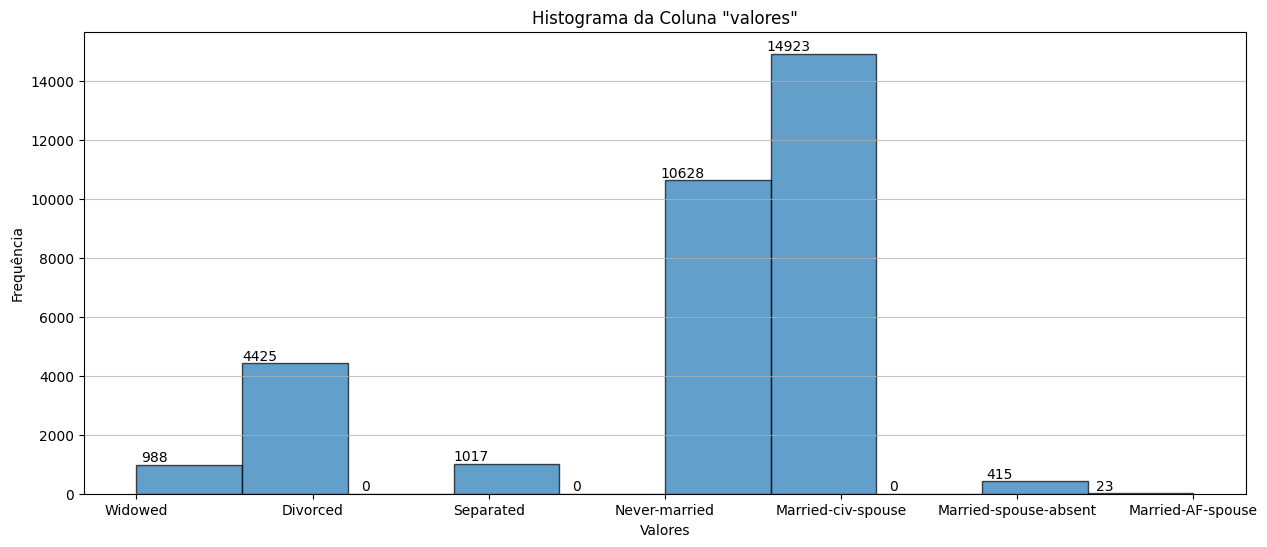

In [21]:
histograma(df_truncado,"marital.status")

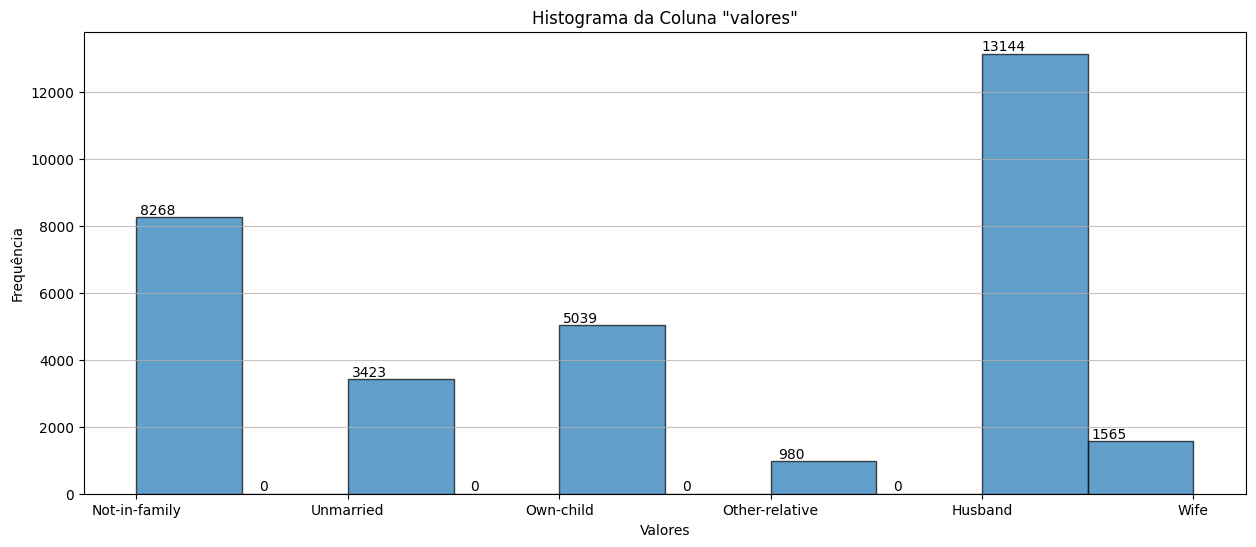

In [22]:
histograma(df_truncado,"relationship")

### Race and Sex

In [23]:
df_truncado["sex"].value_counts()

sex
Male      21695
Female    10724
Name: count, dtype: int64

In [24]:
df_truncado["race"].value_counts()

race
White                 27719
Black                  3079
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

### Hour per Week

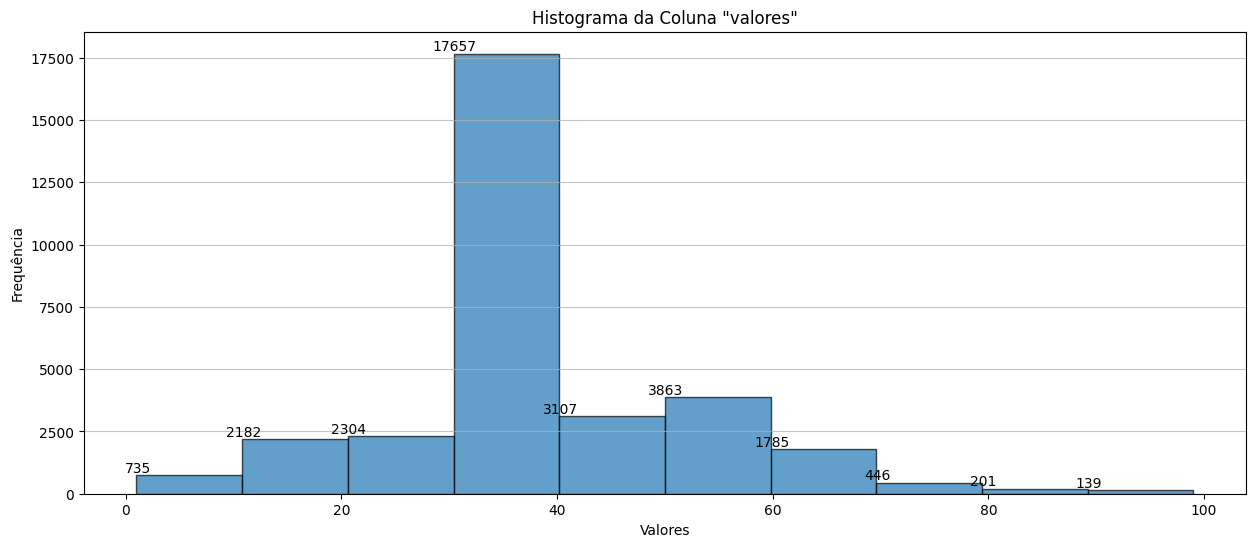

In [56]:
histograma(df_truncado,"hours.per.week")

trabalhar 80 horas semanais ou mais parece um absurdo. Uma semana tem 168 horas. Existem pessoas que realmente trabalham isso ou mais, com uma sobrecarga. Vamos manter por enquanto.

## 4. Divisão dos Dados em Conjuntos de Treinamento e Teste

•	Tarefa: Dividir o dataset em treinamento e teste (usualmente 80%/20%) para garantir a capacidade do modelo de generalizar bem a novos dados.

In [25]:
# Dividir o dataset em treinamento e teste
dataset = df_truncado.copy()

X, y = dataset.drop(columns=["education", "income"]), dataset["income"]


In [26]:
y.value_counts(normalize=True)

income
<=50K    0.75903
>50K     0.24097
Name: proportion, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state= 42)

## 5. Escolha e Implementação de Algoritmos

•	Tarefa: Escolher um ou mais algoritmos de aprendizado supervisionado para treinar o modelo. Testar diferentes algoritmos e ajustar seus hiperparâmetros para melhorar a performance.

•	Algoritmos sugeridos: Logistic Regression, Decision Trees, Random Forest, KNN Classifier/Regression etc.


### KNN

In [55]:
# Separar automaticamente as colunas numéricas e categóricas em X
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

# Configura o pré-processamento com o ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Define o pipeline completo
pipe_knn = imPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Balanceando as classes
    ('classifier', KNeighborsClassifier())
])

# Treinamento do pipeline
pipe_knn.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', KNeighborsClassifier())])

In [57]:
y_knn_pred = pipe_knn.predict(X_test)

### Random Forest

In [50]:
pipe_rf = imPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('classifier', RandomForestClassifier(class_weight='balanced'))
])

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced'))])

In [ ]:
y_rf_pred = pipe_rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_rf_pred))

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.90      0.91      0.90      4922
        >50K       0.69      0.67      0.68      1562

    accuracy                           0.85      6484
   macro avg       0.79      0.79      0.79      6484
weighted avg       0.85      0.85      0.85      6484



### Logistic Regression

In [61]:


pipe_lr = imPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [62]:
y_lr_pred = pipe_lr.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_lr_pred))

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.94      0.81      0.87      4922
        >50K       0.58      0.83      0.68      1562

    accuracy                           0.81      6484
   macro avg       0.76      0.82      0.78      6484
weighted avg       0.85      0.81      0.82      6484



## 6. Avaliação do Modelo

•	Tarefa: Avaliar o desempenho do modelo usando métricas apropriadas para o tipo de problema.

•	Classificação:
	•	Métricas: Acurácia, Precisão, Revocação, F1-Score, AUC-ROC.
	•	Regressão:
	•	Métricas: RMSE, MAE, R².

### KNN

In [90]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_knn_prob = pipe_knn.predict_proba(X_test)[:, 1] 

# F1-Score geral (média ponderada entre as classes)
f1_general = f1_score(y_test, y_knn_pred, average='weighted')
print("F1-Score geral: ", f1_general)

# Recall geral (média ponderada entre as classes)
recall_general = recall_score(y_test, y_knn_pred, average='weighted')
print("Recall geral: ", recall_general)

# ROC-AUC geral (média ponderada entre as classes)
roc_auc_general = roc_auc_score(y_test, y_knn_prob, average='weighted', multi_class='ovr')  # multi_class='ovr' para mais de 2 classes
print("ROC-AUC geral: ", roc_auc_general)


F1-Score geral:  0.7983572222557288
Recall geral:  0.7880937692782233
ROC-AUC geral:  0.8478684897980844


### Random Forest

In [89]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_rf_prob = pipe_rf.predict_proba(X_test)[:, 1] 

# F1-Score geral (média ponderada entre as classes)
f1_general = f1_score(y_test, y_rf_pred, average='weighted')
print("F1-Score geral: ", f1_general)

# Recall geral (média ponderada entre as classes)
recall_general = recall_score(y_test, y_rf_pred, average='weighted')
print("Recall geral: ", recall_general)

# ROC-AUC geral (média ponderada entre as classes)
roc_auc_general = roc_auc_score(y_test, y_rf_prob, average='weighted', multi_class='ovr')  # multi_class='ovr' para mais de 2 classes
print("ROC-AUC geral: ", roc_auc_general)

F1-Score geral:  0.8479405824582659
Recall geral:  0.8482418260333128
ROC-AUC geral:  0.8989158529916895


### Logistic Regression

In [87]:
y_lr_prob = pipe_lr.predict_proba(X_test)[:, 1] 

# F1-Score geral (média ponderada entre as classes)
f1_general = f1_score(y_test, y_lr_pred, average='weighted')
print("F1-Score geral: ", f1_general)

# Recall geral (média ponderada entre as classes)
recall_general = recall_score(y_test, y_lr_pred, average='weighted')
print("Recall geral: ", recall_general)

# ROC-AUC geral (média ponderada entre as classes)
roc_auc_general = roc_auc_score(y_test, y_lr_prob, average='weighted', multi_class='ovr')  # multi_class='ovr' para mais de 2 classes
print("ROC-AUC geral: ", roc_auc_general)

F1-Score geral:  0.8235902109327065
Recall geral:  0.8138494756323257
ROC-AUC geral:  0.9057449867094407


## 7. Ajuste de Hiperparâmetros e Tuning do Modelo

•	Tarefa: Utilizar técnicas como `Grid Search` ou `Random Search` para ajustar hiperparâmetros e melhorar o desempenho do modelo.

- Vamos usar o RandomForest como modelo, pois foi ele que teve os melhores scores.

In [69]:
# Definir os parâmetros a serem testados no GridSearch
param_grid = {
    'classifier__n_estimators': [100, 200],  # Testar apenas 100 e 200 árvores
    'classifier__max_depth': [None, 10],  # Testar profundidade ilimitada e profundidade 10
    'classifier__min_samples_split': [2, 5],  # Testar 2 e 5 amostras para divisão
    'classifier__min_samples_leaf': [1, 2]  # Testar 1 e 2 amostras por folha
}

In [74]:
# Configurar o GridSearchCV
grid_search = GridSearchCV(pipe_rf, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)

# Treinar o modelo com a busca em grade
grid_search.fit(X_train, y_train)

# Mostrar os melhores parâmetros e o melhor modelo
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor modelo:", grid_search.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Melhores parâmetros encontrados: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Melhor modelo: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balan

In [75]:
# Fazer previsões com o melhor modelo encontrado
y_rf_pred = grid_search.predict(X_test)

In [76]:
# Avaliar o desempenho do modelo

print("Classification Report:\n", classification_report(y_test, y_rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_rf_pred))

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.90      0.90      0.90      4922
        >50K       0.69      0.68      0.68      1562

    accuracy                           0.85      6484
   macro avg       0.79      0.79      0.79      6484
weighted avg       0.85      0.85      0.85      6484

Confusion Matrix:
 [[4439  483]
 [ 501 1061]]


## 8. Validação Cruzada e Teste Final

•	Tarefa: Aplicar validação cruzada para verificar a robustez do modelo e garantir que ele não esteja superajustado (overfitting). Em seguida, realizar o teste final no conjunto de teste.


## 9. Interpretação dos Resultados e Conclusão

•	Tarefa: Interpretar os resultados do modelo, destacando insights importantes, limitações e sugestões para melhorias futuras.

- Curva ROC

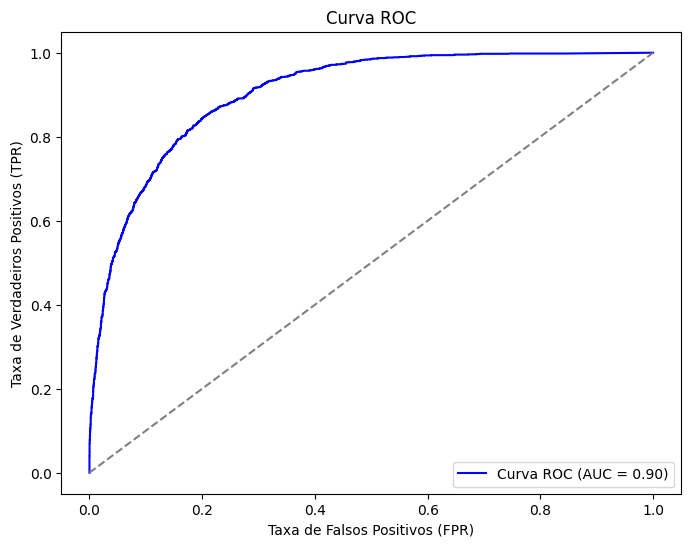

In [78]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Instanciar o LabelEncoder
label_encoder = LabelEncoder()

# Transformar as classes em 0 e 1
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Agora, calcular a curva ROC usando as classes numéricas
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha de aleatoriedade
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


- Matriz Confusão

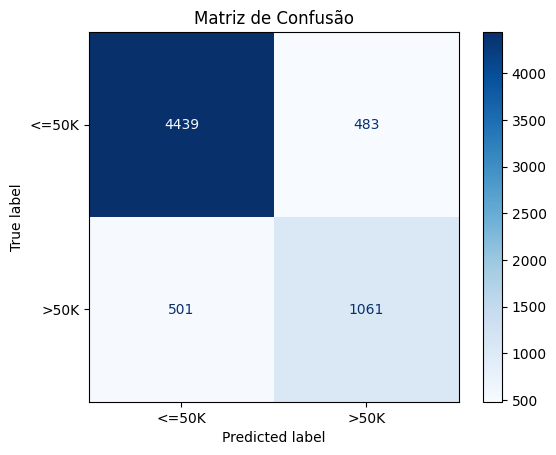

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular a matriz de confusão
y_pred = grid_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão')
plt.show()


- Importância de Features

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_feature_importance(model, num_cols, cat_cols, min_importance=0.10):
    """
    Plota a importância das features do modelo RandomForest, filtrando as features com
    importância acima de um valor mínimo.

    Parameters:
    - model: O modelo treinado (incluindo pré-processamento).
    - num_cols: Lista com os nomes das colunas numéricas.
    - cat_cols: Lista com os nomes das colunas categóricas.
    - min_importance: Valor mínimo de importância para filtrar as features (default: 0.10).
    """
    # Obter a importância das features
    importances = model.named_steps['classifier'].feature_importances_

    # Criar um dataframe com as importâncias e os nomes das features
    feature_names = num_cols.tolist() + list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_cols))
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Filtrar as features com importância maior que o valor mínimo especificado
    feature_importance_df_filtered = feature_importance_df[feature_importance_df['Importance'] > min_importance]

    # Ordenar pela importância
    feature_importance_df_filtered = feature_importance_df_filtered.sort_values(by='Importance', ascending=False)

    # Plotar a importância das features filtradas
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df_filtered['Feature'], feature_importance_df_filtered['Importance'], color='teal')
    plt.xlabel('Importância')
    plt.title(f'Importância das Features (acima de {min_importance})')
    plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar a feature mais importante no topo
    plt.show()


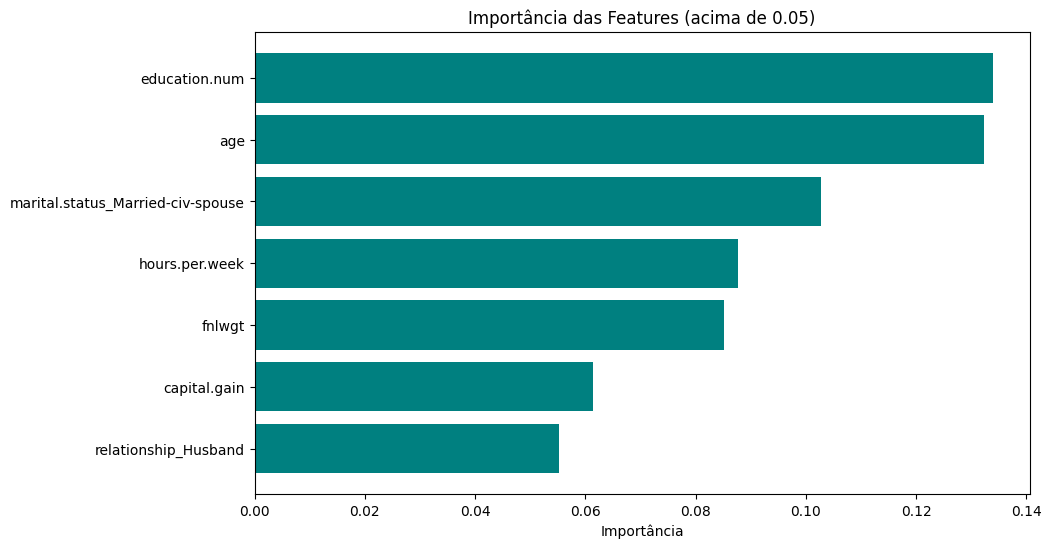

In [83]:
plot_feature_importance(grid_search.best_estimator_, num_cols, cat_cols, min_importance=0.05)


- Discussão

Neste notebook, testamos 3 modelos distintos (KNN, Floresta Aleatória e Regressão Logística). O modelo de Floresta aleatória saiu-se melhor que os outros dois, e portanto foi o escolhido. Após o GridSearch, foi possível garantir que não há overfitting e nem underfitting. Alguns resultados obtidos dos gráficos plotados:

- A curva ROC gerou um falor de 0.90. É um bom resultado, mostrando que o modelo em geral prevê bem ambas as classes

- A matriz confusão reforça o que foi mostrado na curva ROC

- Podemos também observar a importância de algumas features na previsão do modelo. Considerando que temos bons resultados de F1-Score, é seguro dizer que essas features são as determinantes para que separar as classes. Podemos fazer alguns plots abaixo para confirmar.

### Plots Bivariados entre features e Target

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_kde(X, y, features, target):
    """
    Plota a estimativa de densidade de kernel (KDE) das features com a variável target como hue.

    Parameters:
    - X: DataFrame contendo as features.
    - y: Série contendo a variável target.
    - features: Lista com os nomes das features a serem plotadas.
    - target: Nome da coluna da variável target.
    """
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=X, x=feature, hue=y, fill=True, common_norm=False, alpha=0.6)
        plt.title(f'Densidade de {feature} por {target}')
        plt.xlabel(feature)
        plt.ylabel('Densidade')
        plt.legend(title=target, labels=[f'<=50K', f'>50K'])  # Ajuste os rótulos conforme o seu target
        plt.show()

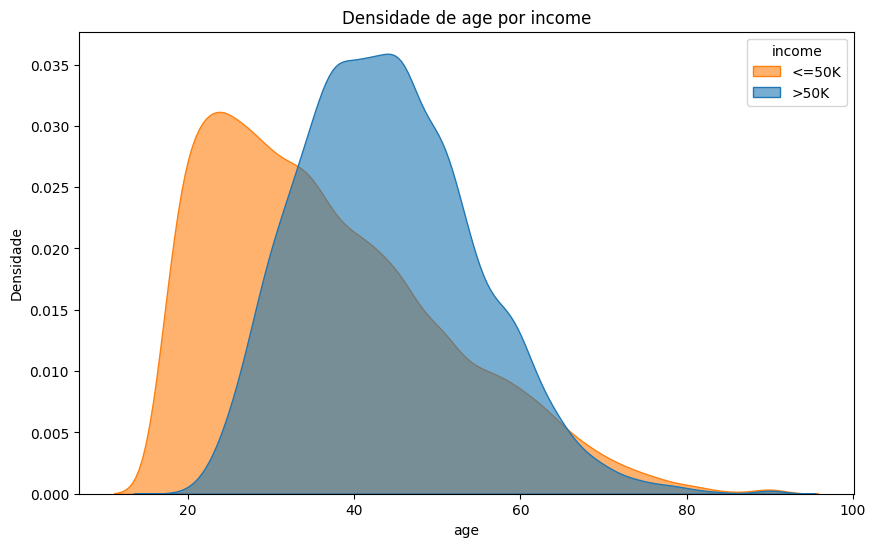

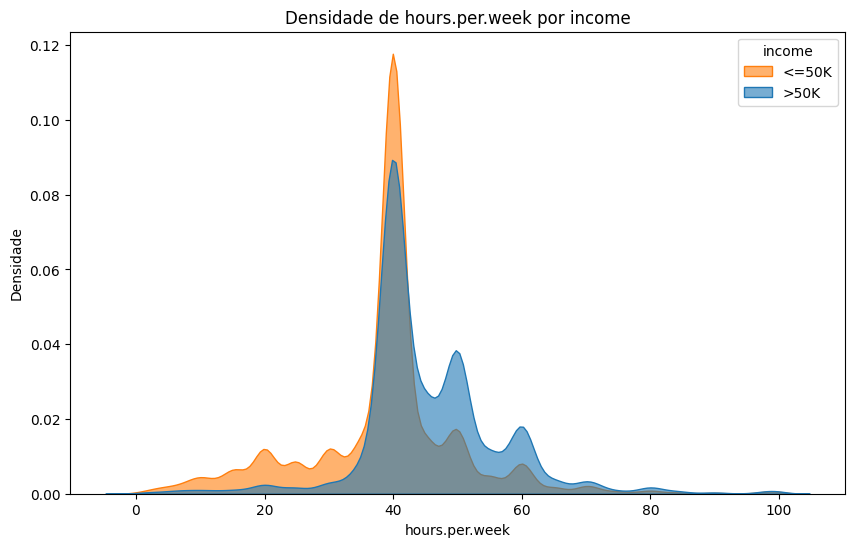

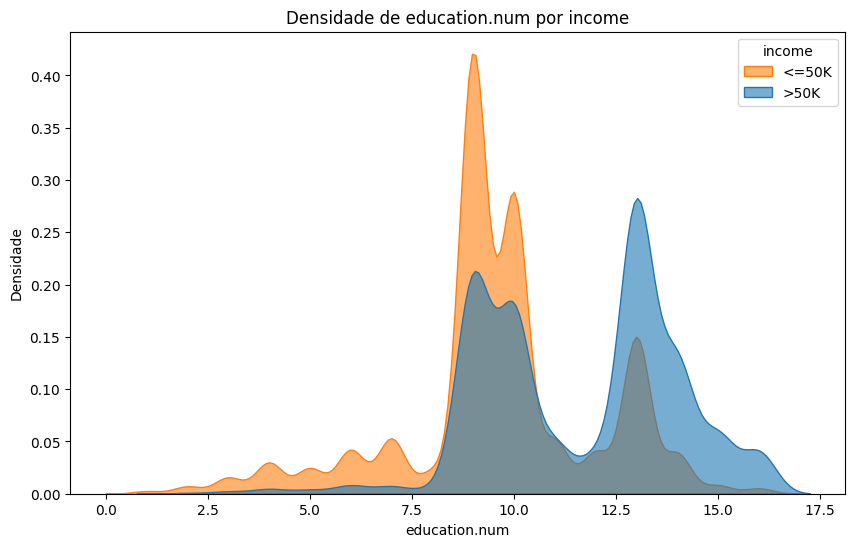

In [111]:
features_to_plot = ['age', 'hours.per.week', 'education.num']  # Lista das features que você quer plotar
plot_feature_kde(X_train, y_train, features_to_plot, 'income')


In [ ]:
# Gerar a tabela com valores únicos de 'education' e 'education.num'
education_table = dataset[['education', 'education.num']].drop_duplicates().reset_index(drop=True)

# Ordenar a tabela por 'education.num' em ordem decrescente
education_table_sorted = education_table.sort_values(by='education.num', ascending=False).reset_index(drop=True)

# Exibir a tabela ordenada
print(education_table_sorted)

       education  education.num
0      Doctorate             16
1    Prof-school             15
2        Masters             14
3      Bachelors             13
4     Assoc-acdm             12
5      Assoc-voc             11
6   Some-college             10
7        HS-grad              9
8           12th              8
9           11th              7
10          10th              6
11           9th              5
12       7th-8th              4
13       5th-6th              3
14       1st-4th              2
15     Preschool              1
